In [1]:
!pip install diplib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 7.5 MB/s eta 0:00:00


In [2]:
#import necessary packages
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
from diplib import MeasurementTool as Tool
from diplib import Threshold, Label

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


In [3]:
# mount to internal image files
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/ImageAnalysis/Practical6/'

Mounted at /content/drive/


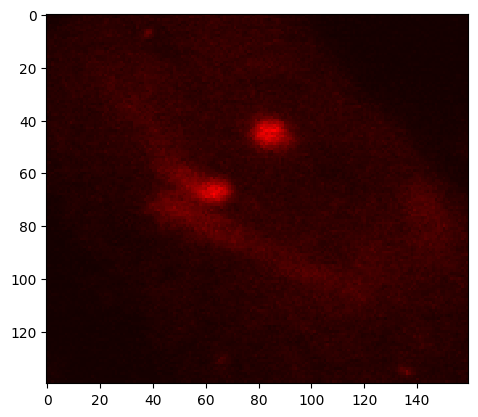

3D Scalar image:
    data type:      UINT8
    sizes:          {160, 140, 16}
    strides:        {1, 160, 22400}, tensor stride 1
    data pointer:   0x56205de55530 (shared among 1 images)
    origin pointer: 0x56205de55530



In [7]:
chromo_tif = dip.ImageReadTIFF(path + "CHROMO3D.tif")
chromo_tif.Show()

chromo_ics_data = dip.ImageReadICS(path +  "CHROMO3D.ICS")
#chromo_ic.Show()
print(chromo_ics_data)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image, ImageFilter

tif_path = path + "CHROMO3D.tif"
tif = Image.open(tif_path)



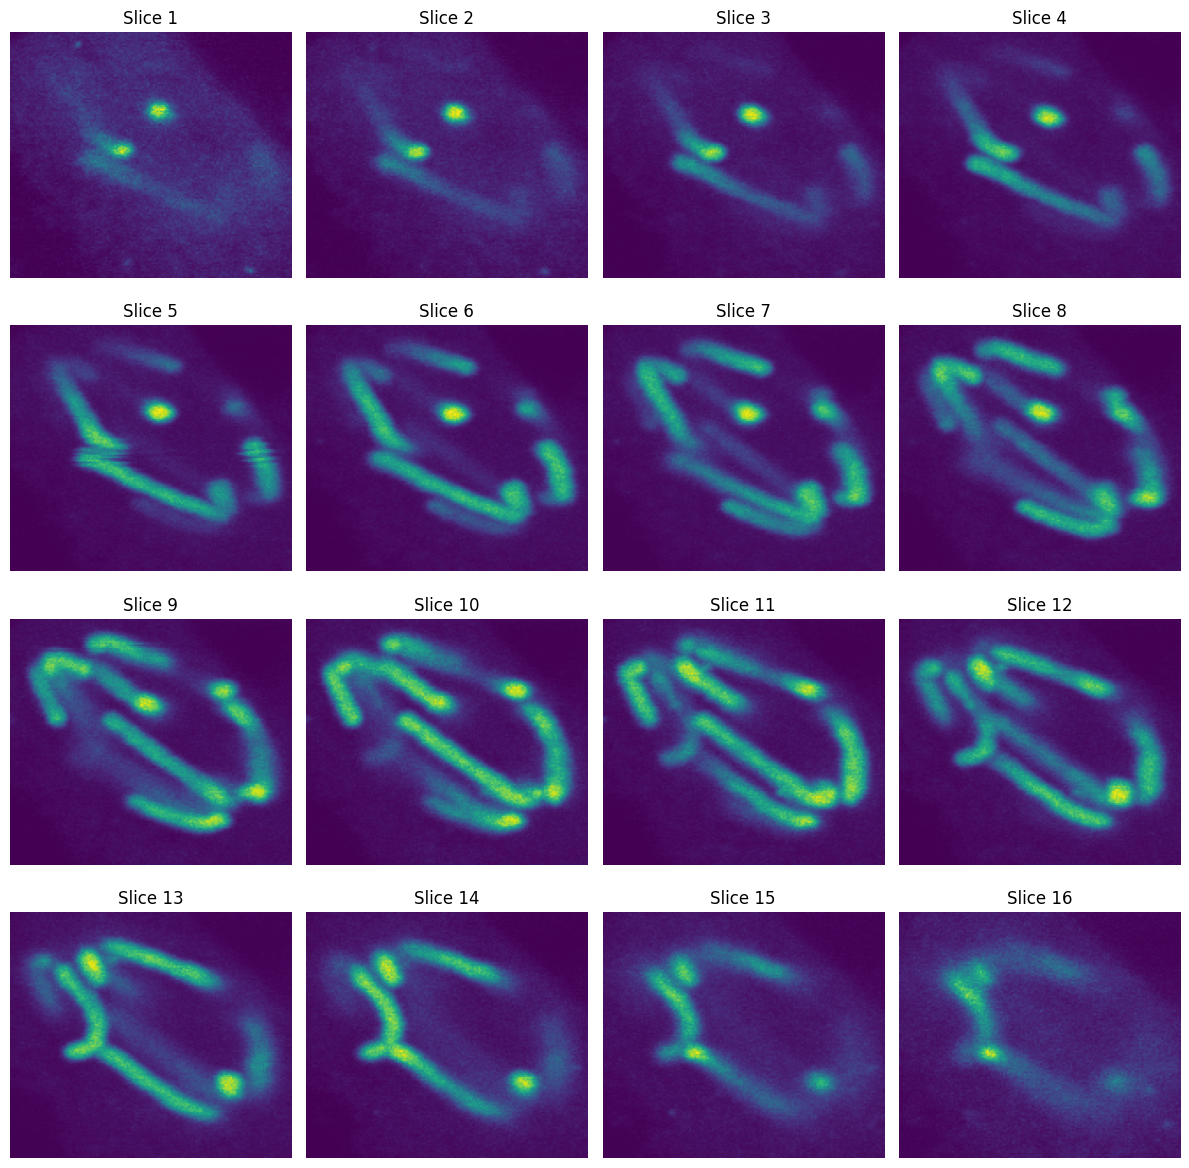

In [19]:
#for i ,j in zip(chromo_tif.get_iter_image(), fnames):i.get_frame().save(j,"TIFF")
num_slices = 16
fig, axes = plt.subplots(4,4, figsize =(12,12))
for i in range(num_slices):
  ax = axes[i // 4, i % 4]
  tif.seek(i)
  slice = np.array(tif)

  ax.imshow(slice)
  ax.axis('off')
  ax.set_title(f'Slice {i+1}')

plt.tight_layout()
plt.show()

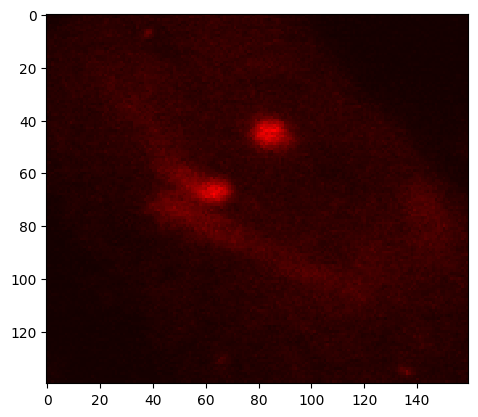

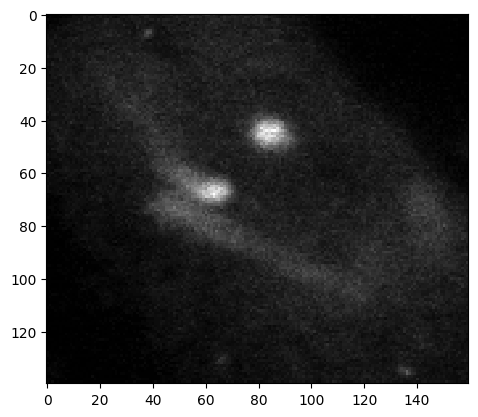

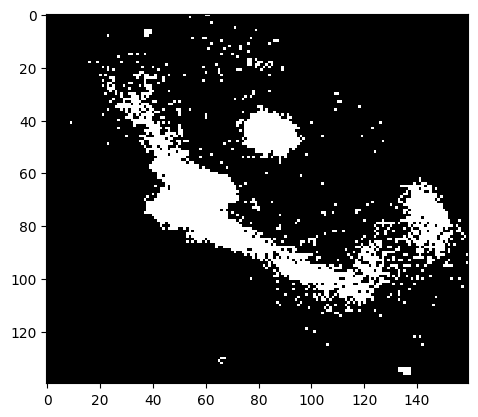

In [64]:
chromo_tif.Show()

image_array = np.array(chromo_tif)
gray_image = np.mean(image_array, axis=2)
gray_image_dip = dip.Image(gray_image)
gray_image_dip.Show()

#gdip = dip.MedianFilter(gray_image_dip)
iso_thresh = dip.OtsuThreshold(gray_image_dip)
iso_thresh.Show()

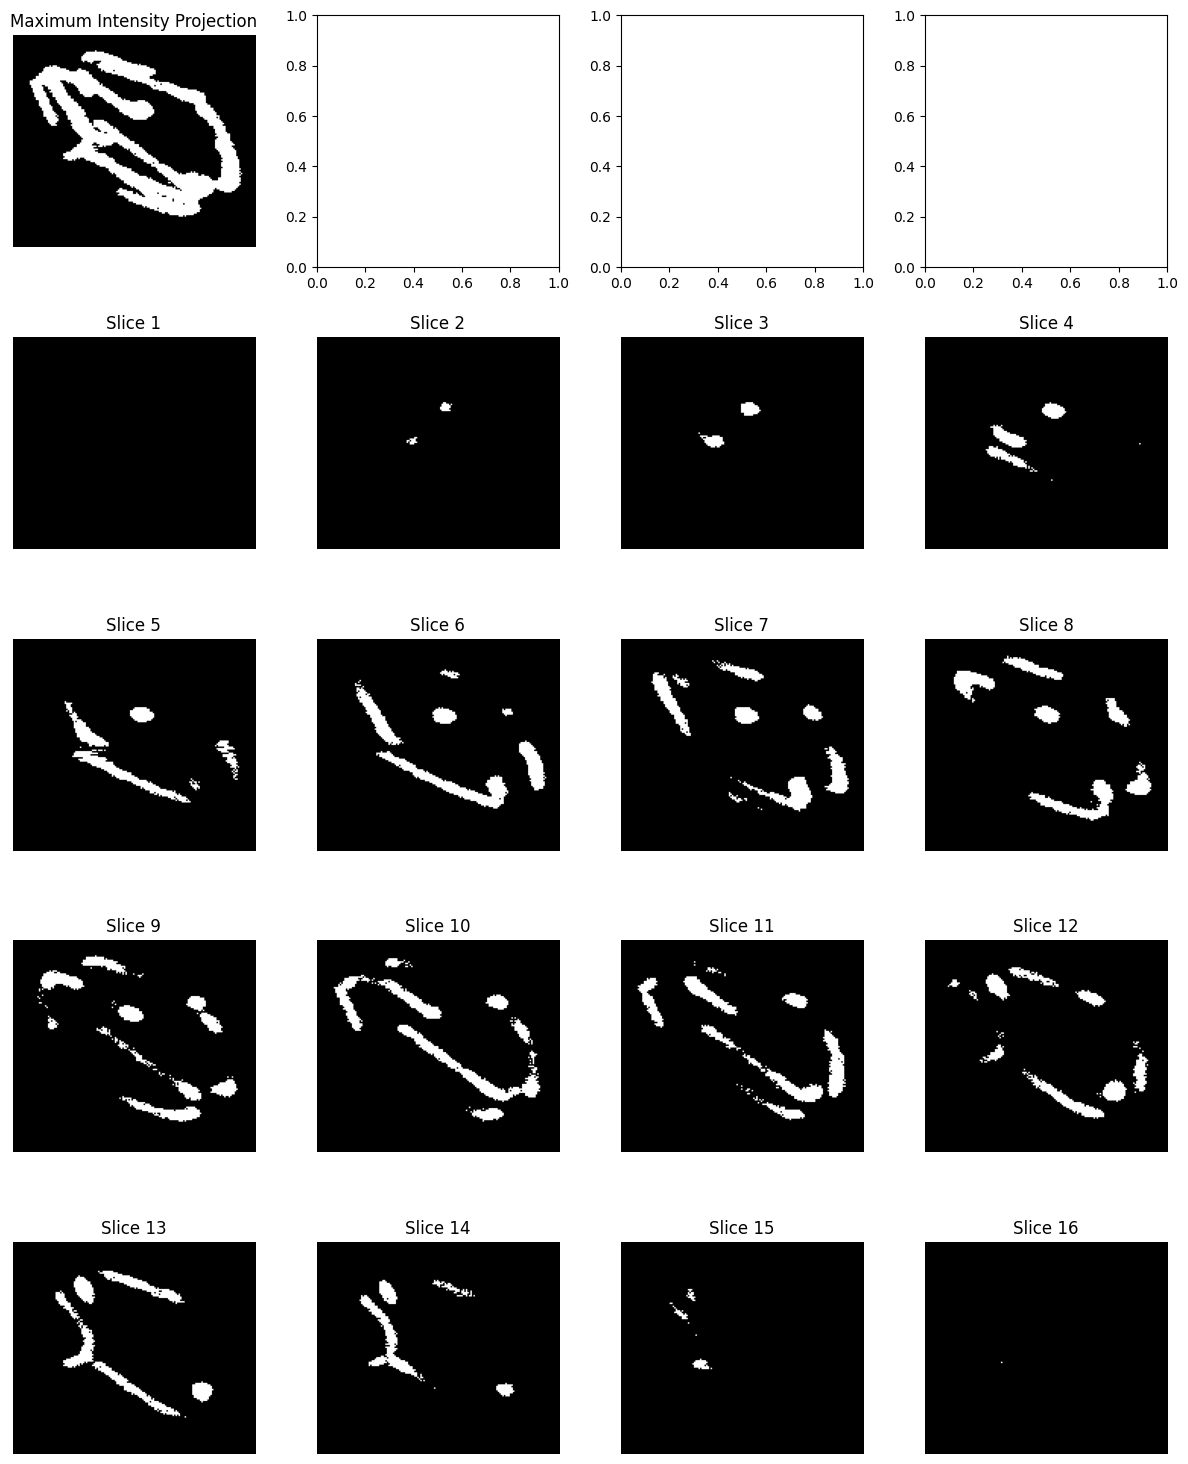

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming chromo_tif is already defined and is your 3D TIFF image object
# Assuming fnames is a list of filenames corresponding to each slice

num_slices = 16
fig, axes = plt.subplots(5, 4, figsize=(12, 15))

fnames = ['1.tiff', '2.tiff', '3.tiff', '4.tiff',
          '5.tiff', '6.tiff', '7.tiff', '8.tiff',
          '9.tiff', '10.tiff', '11.tiff', '12.tiff',
          '13.tiff', '14.tiff', '15.tiff', '16.tiff']
# Define the threshold value
threshold_value = 128  # Adjust this value according to your data

# Create an array to store all slices for MIP
all_slices = []

for i, fname in zip(range(num_slices), fnames):
    ax = axes[i // 4 + 1, i % 4]
    tif.seek(i)
    slice = np.array(tif)

    # Apply thresholding
    thresholded_slice = slice > threshold_value

    # Store the slice for MIP calculation
    all_slices.append(thresholded_slice)

    # Display the thresholded slice
    ax.imshow(thresholded_slice, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Slice {i + 1}')

    # Save the thresholded slice as a TIFF file
    Image.fromarray(thresholded_slice.astype(np.uint8) * 255).save(fname, "TIFF")

# Calculate the Maximum Intensity Projection
all_slices_array = np.stack(all_slices, axis=0)
mip = np.max(all_slices_array, axis=0)

# Display the MIP
ax_mip = axes[0, 0]
ax_mip.imshow(mip, cmap='gray')
ax_mip.axis('off')
ax_mip.set_title('Maximum Intensity Projection')


# Hide unused subplots
for j in range(num_slices, 16):
    ax = axes[j // 4 + 1, j % 4]
    ax.axis('off')

plt.tight_layout()
plt.show()


[255 238 221 204 187 170 153 136 119 102  85  68  51  34  17   0]


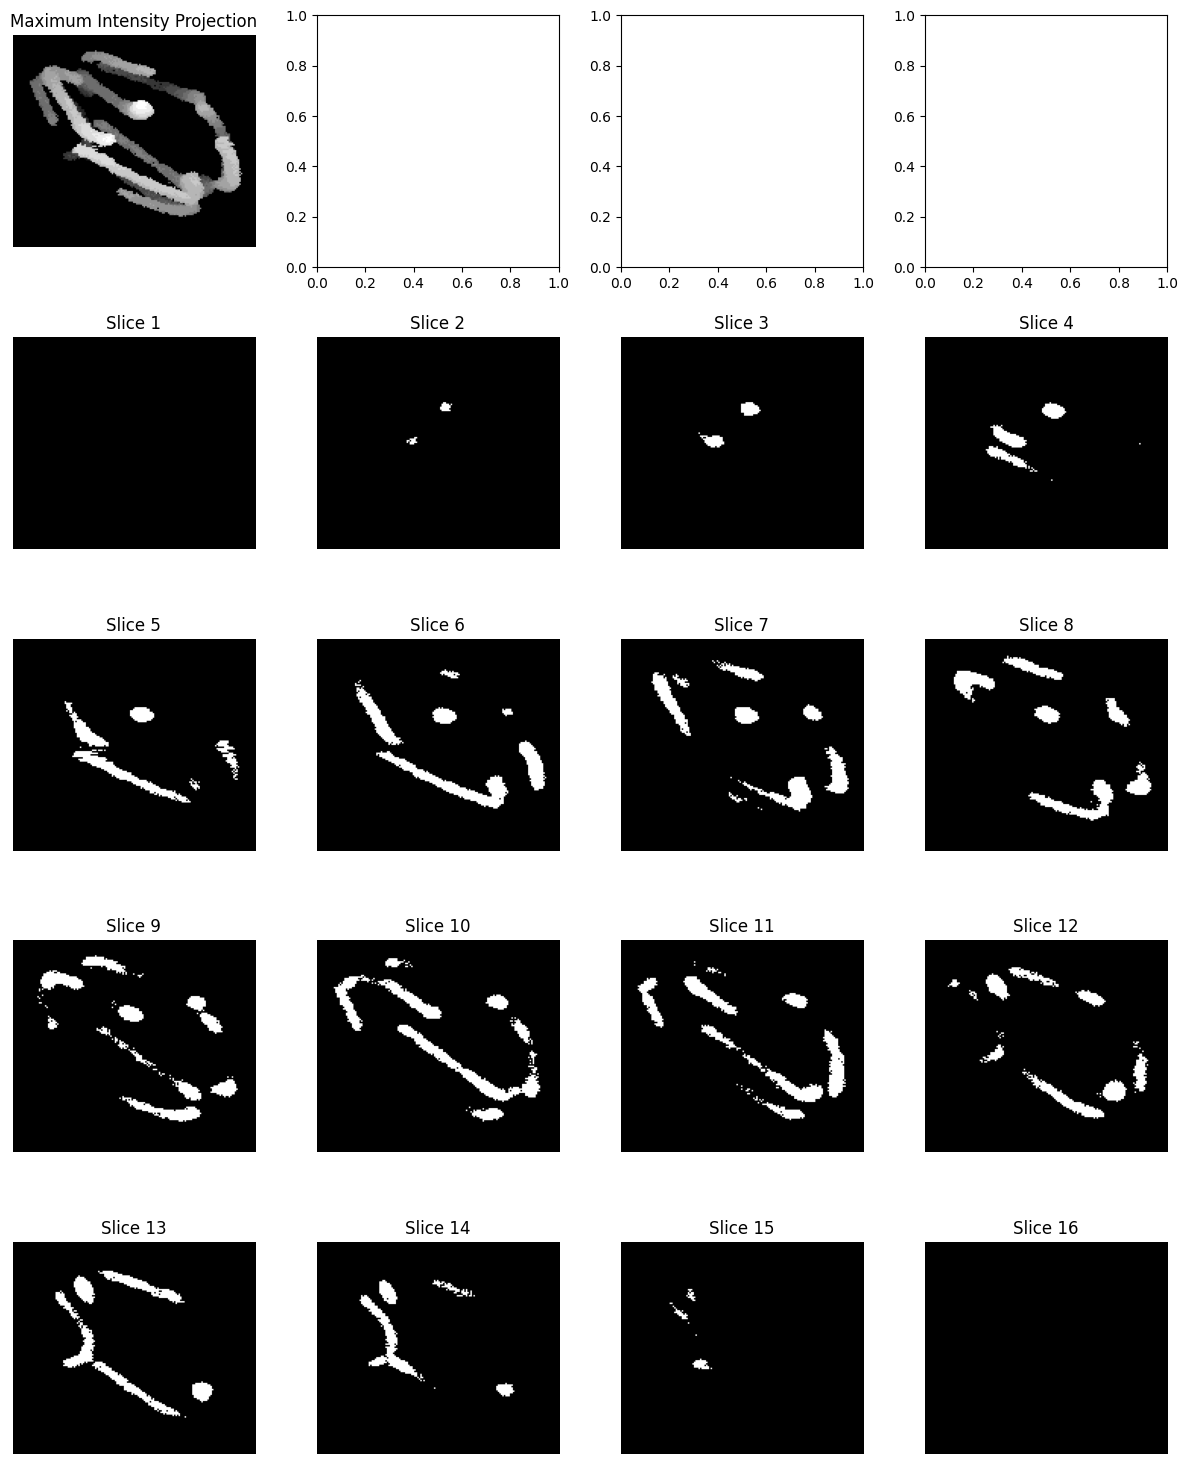

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

num_slices = 16
fig, axes = plt.subplots(5, 4, figsize=(12, 15))

threshold_value = 128

# Create an array to store all slices for MIP
all_slices = []

# Calculate intensity values for depth cueing
intensity_values = np.linspace(255, 0, num_slices, dtype=np.uint8)
print(intensity_values)

for i, fname in zip(range(num_slices), fnames):
    ax = axes[i // 4 + 1, i % 4]
    tif.seek(i)
    slice = np.array(tif)

    # Apply thresholding
    thresholded_slice = slice > threshold_value

    # Apply depth cueing by multiplying with the corresponding intensity value
    depth_cued_slice = thresholded_slice.astype(np.uint8) * intensity_values[i]

    # Store the slice for MIP calculation
    all_slices.append(depth_cued_slice)

    # Display the depth-cued slice
    ax.imshow(depth_cued_slice, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Slice {i + 1}')

    # Save the depth-cued slice as a TIFF file
    Image.fromarray(depth_cued_slice).save(fname, "TIFF")

# Calculate the Maximum Intensity Projection (MIP)
all_slices_array = np.stack(all_slices, axis=0)
mip = np.max(all_slices_array, axis=0)

# Display the MIP
ax_mip = axes[0, 0]
ax_mip.imshow(mip, cmap='gray')
ax_mip.axis('off')
ax_mip.set_title('Maximum Intensity Projection')

# Hide unused subplots
for j in range(num_slices, 16):
    ax = axes[j // 4 + 1, j % 4]
    ax.axis('off')

plt.tight_layout()
plt.show()
